In [1]:
#path to kidney hubmap csv
PATH = "../csv/Kidney_HuBMAP_Portal"

In [2]:
import os
import pandas as pd

dict = {}

for file in os.listdir(PATH):
    data = pd.read_csv(os.path.join(PATH,file))[['cell_type','count']]
    data.index = data['cell_type']
    data = data["count"]
    
    dict[file[:-4]] = pd.Series(data).to_dict()

In [3]:
unique_cts = []
for key in dict.keys():
    unique_cts.extend(list(dict[key].keys()))
unique_cts = set(unique_cts) 

In [4]:
ct_counts_mat = pd.DataFrame(data=[dict[key] for key in dict.keys()],columns=list(unique_cts))

In [5]:
ct_counts_mat

Connecting Tubule Intercalated Type A  Glomerular Capillary Endothelial  \
0                                     NaN                               NaN   
1                                     2.0                             165.0   
2                                     NaN                               NaN   
3                                     NaN                               1.0   
4                                     NaN                               NaN   
..                                    ...                               ...   
72                                    NaN                               1.0   
73                                    NaN                               NaN   
74                                    NaN                               NaN   
75                                    NaN                               NaN   
76                                    NaN                               NaN   

    Macula Densa  Non-classical monocyte  Descending Thin Limb Type 2  \
0            NaN                     1.0                          7.0   
1           78.0                     1.0                        636.0   
2            3.0                     NaN                          2.0   
3           26.0                     NaN                         39.0   
4            9.0                     NaN                          2.0   
..           ...                     ...                          ...   
72         192.0                     NaN                         24.0   
73           NaN                     NaN                          NaN   
74           NaN                     2.0                          NaN   
75           NaN                     NaN                          NaN   
76           NaN                     NaN                          NaN   

    Fibroblast  Vascular Smooth Muscle / Pericyte  \
0         16.0                                9.0   
1        777.0                               22.0   
2         32.0                               11.0   
3         16.0                               13.0   
4         45.0                                NaN   
..         ...                                ...   
72        21.0                               11.0   
73       165.0                               34.0   
74       852.0                              608.0   
75         NaN                                NaN   
76       206.0                              257.0   

    Descending Thin Limb Type 3  Medullary Fibroblast  \
0                         101.0                 277.0   
1                          60.0                  47.0   
2                          20.0                 254.0   
3                          17.0                  15.0   
4                          19.0                  16.0   
..                          ...                   ...   
72                          6.0                  41.0   
73                          NaN                 130.0   
74                          1.0                 347.0   
75                          NaN                   NaN   
76                          NaN                  61.0   

    Renin-positive Juxtaglomerular Granular  ...  Intercalated Type B  \
0                                       NaN  ...                  2.0   
1                                       1.0  ...                185.0   
2                                       1.0  ...                 30.0   
3                                       3.0  ...                  1.0   
4                                       NaN  ...                  NaN   
..                                      ...  ...                  ...   
72                                      NaN  ...                  NaN   
73                                      NaN  ...                  NaN   
74                                      1.0  ...                  NaN   
75                                      NaN  ...                  NaN   
76                                      2.0  ...     

In [6]:
ct_counts_mat['HuBMAP_dataset_id'] = list(dict.keys())

In [7]:
ct_counts_mat.iloc[:,:-1] = ct_counts_mat.iloc[:,:-1].fillna(0).astype(int)

/var/folders/4p/h6qyq5d960lc6ynv7nz6vplr0000gn/T/ipykernel_7486/133977190.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ct_counts_mat.iloc[:,:-1] = ct_counts_mat.iloc[:,:-1].fillna(0).astype(int)


In [8]:
ct_counts_mat

Connecting Tubule Intercalated Type A  Glomerular Capillary Endothelial  \
0                                       0                                 0   
1                                       2                               165   
2                                       0                                 0   
3                                       0                                 1   
4                                       0                                 0   
..                                    ...                               ...   
72                                      0                                 1   
73                                      0                                 0   
74                                      0                                 0   
75                                      0                                 0   
76                                      0                                 0   

    Macula Densa  Non-classical monocyte  Descending Thin Limb Type 2  \
0              0                       1                            7   
1             78                       1                          636   
2              3                       0                            2   
3             26                       0                           39   
4              9                       0                            2   
..           ...                     ...                          ...   
72           192                       0                           24   
73             0                       0                            0   
74             0                       2                            0   
75             0                       0                            0   
76             0                       0                            0   

    Fibroblast  Vascular Smooth Muscle / Pericyte  \
0           16                                  9   
1          777                                 22   
2           32                                 11   
3           16                                 13   
4           45                                  0   
..         ...                                ...   
72          21                                 11   
73         165                                 34   
74         852                                608   
75           0                                  0   
76         206                                257   

    Descending Thin Limb Type 3  Medullary Fibroblast  \
0                           101                   277   
1                            60                    47   
2                            20                   254   
3                            17                    15   
4                            19                    16   
..                          ...                   ...   
72                            6                    41   
73                            0                   130   
74                            1                   347   
75                            0                     0   
76                            0                    61   

    Renin-positive Juxtaglomerular Granular  ...  \
0                                         0  ...   
1                                         1  ...   
2                                         1  ...   
3                                         3  ...   
4                                         0  ...   
..                                      ...  ...   
72                                        0  ...   
73                                        0  ...   
74                                        1  ...   
75                                        0  ...   
76                                        2  ...   

    Peritubular Capilary Endothelial   Monocyte-derived  \
0                                   3                 2   
1                                 130                18   
2                                   3                 

In [9]:
ct_counts_mat.to_csv("ct_counts_mat.csv")

In [10]:
#https://docs.google.com/spreadsheets/d/1cwxztPg9sLq0ASjJ5bntivUk6dSKHsVyR1bE6bXvMkY/edit#gid=1529271254
impdata = pd.read_csv("IMPSHEET_1.csv")
impdata.columns = impdata.iloc[0,:]
impdata = impdata.iloc[1:,[2,3]]

In [11]:
impdata['dataset_id'] = impdata.apply(lambda row: row['dataset_id'][:-4],axis=1)

In [12]:
impdata

0                                     dataset_id HuBMAP_tissue_block_id
1           1b9d8702-5af8-4142-85ed-020eb06ec4f6                    NaN
2           53d208b0-2cfd-4366-9866-c3c6114081bc                    NaN
3           53d208b0-2cfd-4366-9866-c3c6114081bc                    NaN
4             CODEX_Florida_19-003-lymph-node-R2                    NaN
5     CODEX_Florida_20-008-lymphnode10_righthalf                    NaN
...                                          ...                    ...
1258                                 HBM992.XNZH        HBM833.VZTL.864
1259                                 HBM993.ZZWK        HBM528.ZLVW.967
1260                                 HBM996.MDQH        HBM432.KLVR.258
1261                                 HBM996.MDQH        HBM545.TFNG.256
1262                                 HBM999.CXFH        HBM876.QFMP.836

[1262 rows x 2 columns]

In [13]:
final = pd.merge(ct_counts_mat,impdata,left_on="HuBMAP_dataset_id", right_on="dataset_id", how="left").drop("dataset_id",axis=1).drop("HuBMAP_dataset_id", axis=1)

In [14]:
final_agg = final.groupby(by=['HuBMAP_tissue_block_id']).agg(sum)

In [15]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):
   return dot(a, b)/(norm(a)*norm(b))

In [16]:
cos_sim_df = pd.DataFrame(columns=final_agg.index)

In [17]:
cos_sim_df["HuBMAP_tissue_block_id"] = final_agg.index.tolist()

In [18]:
def find_cos_sim(row):
    arr = []
    for col in row.index:
        if col != "HuBMAP_tissue_block_id":
            arr.append(cos_sim(final_agg.loc[col],final_agg.loc[row["HuBMAP_tissue_block_id"]]))
    return arr

In [19]:
cos_sim_df = cos_sim_df.apply(lambda row: find_cos_sim(row), axis=1)

In [20]:
import numpy as np

In [21]:
cos_sim_df = np.array(cos_sim_df.tolist())

In [22]:
cos_sim_df = pd.DataFrame(cos_sim_df,index=final_agg.index.tolist(),columns=final_agg.index.tolist())

In [23]:
cos_sim_df

HBM224.HCFB.249  HBM297.PFXV.394  HBM336.BZXG.436  \
HBM224.HCFB.249         1.000000         0.726560         0.812948   
HBM297.PFXV.394         0.726560         1.000000         0.624926   
HBM336.BZXG.436         0.812948         0.624926         1.000000   
HBM339.DBQF.784         0.964021         0.751506         0.732329   
HBM345.QSPF.289         0.622300         0.431613         0.528421   
HBM434.JDFP.839         0.686334         0.266264         0.701974   
HBM449.THVK.739         0.851887         0.497374         0.724251   
HBM453.BKZB.338         0.607852         0.202624         0.762596   
HBM455.PRVR.965         0.607731         0.963233         0.593667   
HBM486.QXHD.874         0.830345         0.805444         0.959393   
HBM496.GJFX.393         0.552710         0.232306         0.642864   
HBM525.HTJF.586         0.912545         0.690996         0.530433   
HBM534.PQDR.545         0.695956         0.272452         0.847522   
HBM538.RWLX.332         0.429886         0.327690         0.189530   
HBM547.QLDF.845         0.902269         0.789270         0.922058   
HBM556.CFNP.485         0.750155         0.923987         0.826425   
HBM557.PWFN.956         0.671683         0.975945         0.652995   
HBM562.WMRL.498         0.698820         0.201857         0.473430   
HBM566.KXSQ.967         0.628994         0.957908         0.636365   
HBM574.LFRK.262         0.783939         0.911117         0.864583   
HBM587.VWCF.356         0.684122         0.965308         0.707710   
HBM635.PSTJ.637         0.705959         0.443442         0.511181   
HBM638.HSFV.957         0.813676         0.885568         0.822104   
HBM642.VZNT.722         0.641257         0.447584         0.176916   
HBM653.SFTB.462         0.438356         0.171567         0.013856   
HBM667.TFXK.856         0.833451         0.916311         0.546587   
HBM695.TGJS.338         0.121386         0.051369         0.013089   
HBM748.GDSK.748         0.733742         0.939715         0.795135   
HBM752.DHVB.758         0.671477         0.987388         0.592808   
HBM757.NMDS.629         0.705883         0.322499         0.754100   
HBM782.RNDZ.677         0.731624         0.949334         0.703486   
HBM788.KSZC.942         0.773131         0.884643         0.858605   
HBM796.XJWH.729         0.780955         0.863848         0.875423   
HBM833.VZTL.864         0.722517         0.367595         0.876893   
HBM838.FRWC.772         0.945929         0.653679         0.733389   
HBM853.SNJJ.892         0.630125         0.191058         0.721874   
HBM876.SJWP.278         0.728003         0.986850         0.659709   
HBM937.HPQL.829         0.951797         0.537959         0.712862   
HBM964.XZCR.478         0.310534         0.267018         0.310432   
HBM974.MTJZ.548         0.570259         0.279662         0.684777   
HBM979.SSNH.934         0.741881         0.438100         0.245108   
HBM987.ZCTQ.736         0.731349         0.448241         0.396849   

                 HBM339.DBQF.784  HBM345.QSPF.289  HBM434.JDFP.839  \
HBM224.HCFB.249         0.964021         0.622300         0.686334   
HBM297.PFXV.394         0.751506         0.431613         0.266264   
HBM336.BZXG.436         0.732329         0.528421         0.701974   
HBM339.DBQF.784         1.000000         0.633293         0.628647   
HBM345.QSPF.289         0.633293         1.000000         0.615229   
HBM434.JDFP.839         0.628647         0.615229         1.000000   
HBM449.THVK.739         0.888597         0.711692         0.747269   
HBM453.BKZB.338         0.569677         0.734953         0.738808   
HBM455.PRVR.965         0.627943         0.362461         0.117423   
HBM486.QXHD.874         0.777123         0.526571         0.567737   
HBM496.GJFX.393         0.432464         0.782379         0.661459   
HBM525.HTJF.586         0.934347         0.497052         0.527103   
HBM534.PQDR.545         0.634757         0.642576         0.783913   
HBM538.RWLX.332         0.

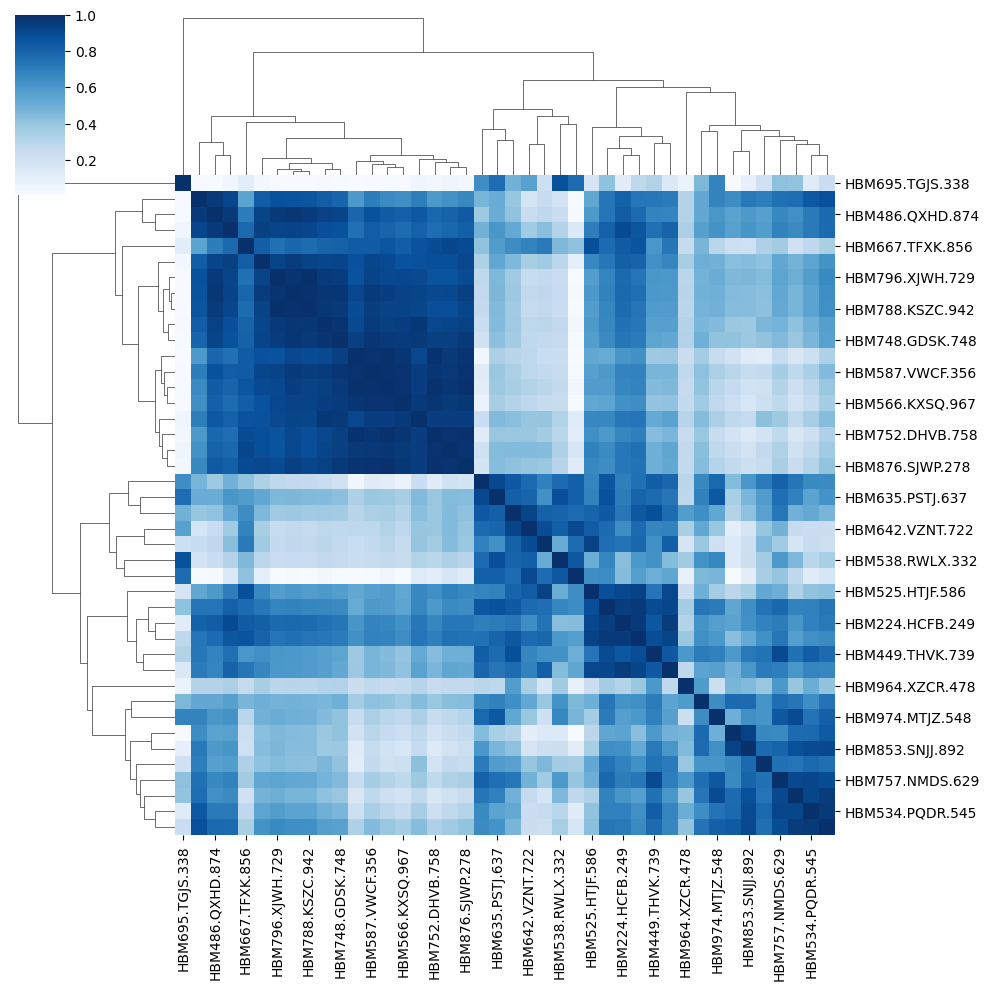

In [24]:
import seaborn as sns

sns.clustermap(cos_sim_df, cmap="Blues")